# Fine structure

In [1]:
# load packages
from IPython.display import Latex
from positronium import Ps, Bohr
from positronium.constants import h, frequency_hfs
from positronium.interval import frequency
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## hyperfine splitting of the ground state 

Estimate the ground-state hyperfine splitting interval, according to 

  > Richard A. Ferrell (1951) Phys. Rev. 84, 858

  > http://dx.doi.org/10.1103/PhysRev.84.858

This calculation does not include the Lamb shift/ radiative corrections.

In [2]:
# ortho-PS
s131 = Ps(n=1, l=0, S=1, J=1)
# para-Ps
s110 = Ps(n=1, l=0, S=0, J=0)
# splitting
Latex('$\Delta E_{hfs} = %.5f$ GHz' % (1e-9 * (s131.energy(unit='J') -
                                               s110.energy(unit='J')) / h))

<IPython.core.display.Latex object>

This compares to the experimtal value of
> M. W. Ritter, P. O. Egan, V. W. Hughes, and K. A. Woodle (1984) Phys. Rev. A 30, 1331

> http://dx.doi.org/10.1103/PhysRevA.30.1331

In [3]:
Latex('$\Delta E_{hfs} = %.5f \pm %.5f$ GHz'%(1e-9 * frequency_hfs, 1e-9 * frequency_hfs.uncertainty))

<IPython.core.display.Latex object>

## fine structure of $n=2$

Use Ferrel's equation to estimate the $n=2$ fine structure energy levels.  This calculation is accurate to around 5 %.  For the results of more complete bound state QED calculations see,

> Richard Ley (2002) Appl. Surf. Sci. 194, 301 

> https://dx.doi.org/10.1016/S0169-4332(02)00139-3

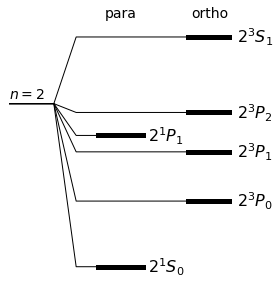

In [4]:
fig, ax = plt.subplots(figsize=(4, 5))

# n=2
ax.text(0.4,  -Bohr.energy(2, unit='eV') + 1e-6, '$n=2$',horizontalalignment='center', 
        verticalalignment='bottom', fontsize=14)

# para
## x coordinates for plotting
para_state = np.array([2, 3])
para_connector = np.array([0, 1, 1.5, 2])
## S state
s210 = Ps(n=2, l=0, S=0, J=0)
## P state
p211 = Ps(n=2, l=1, S=0, J=1)
## plotting
for singlet in [s210, p211]:
    ax.plot(para_state, np.array([0,0]) + singlet.energy(unit='eV'), c='k', lw=5)
    ax.plot(para_connector, np.array([Bohr.energy(float('inf'), 2, unit='eV'),
                                      Bohr.energy(float('inf'), 2, unit='eV'),
                                      singlet.energy(unit='eV'),
                                      singlet.energy(unit='eV')]), c='k', lw=1)
    # label
    ax.text(3.1, singlet.energy(unit='eV'), singlet.tex(), verticalalignment='center', fontsize=16)

# ortho
## x coordinates for plotting
ortho_state = np.array([4, 5])
ortho_connector = np.array([0, 1, 1.5, 4])
## S state
s231 = Ps(n=2, l=0, S=1, J=1)
## P states
p232 = Ps(n=2, l=1, S=1, J=2)
p231 = Ps(n=2, l=1, S=1, J=1)
p230 = Ps(n=2, l=1, S=1, J=0)
## plotting
for triplet in [s231, p232, p231, p230]:
    ax.plot(ortho_state, np.array([0,0]) + triplet.energy(unit='eV'), c='k', lw=5)
    ax.plot(ortho_connector, np.array([Bohr.energy(float('inf'), 2, unit='eV'),
                                       Bohr.energy(float('inf'), 2, unit='eV'),
                                       triplet.energy(unit='eV'), 
                                       triplet.energy(unit='eV')]), c='k', lw=1)
    # label
    ax.text(5.1, triplet.energy(unit='eV'), triplet.tex(), verticalalignment='center', fontsize=16)

# format
ax.set_ylim(-1.7008, -1.700675)
ax.set_yticks([])
ax.set_xlim(0, 5)
ax.set_xticks([2.5, 4.5])
ax.set_xticklabels(['para', 'ortho'], fontsize=14)
# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.xaxis.tick_top()

plt.show()

In [5]:
# n=2, l=0, hyperfine splitting interval
Latex('$\Delta E_{hfs} = %.4f$ GHz' % (1e-9 * (s231.energy(unit='J') -
                                               s210.energy(unit='J')) / h))

<IPython.core.display.Latex object>

Compares to Ley's (proper) value of 25.424 GHz. And ...

In [6]:
_2s = Ps(n=2, l=0, S=1, J=1)
_2p = Ps(n=2, l=1, S=1, J=2)
print(frequency(_2s, _2p), 'GHz')

8.394450896556734 GHz


(should be 8.626 GHz)